# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

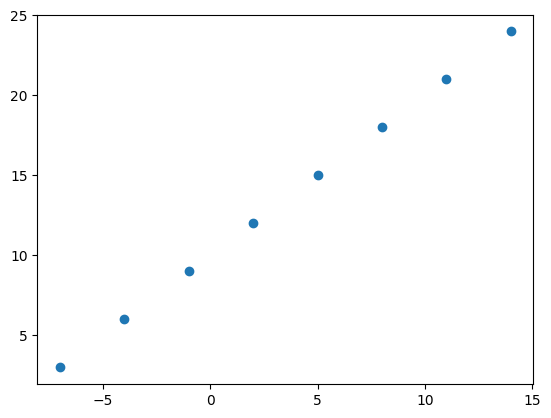

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [5]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [7]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

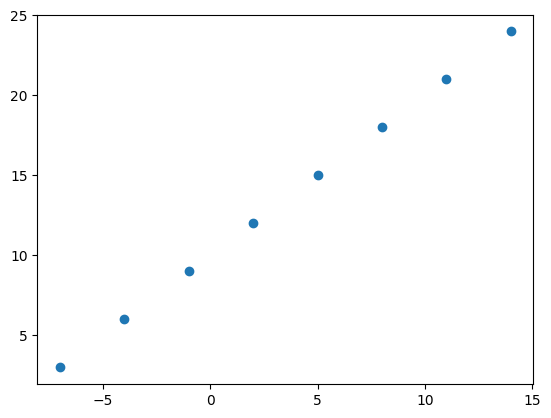

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

In [12]:
tf.random.set_seed(42)

# Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 10.7465 - mae: 10.7465
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 10.6140 - mae: 10.6140
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 10.4815 - mae: 10.4815
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 10.3490 - mae: 10.3490
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 10.2165 - mae: 10.2165


In [13]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 141ms/step


array([[16.399021]], dtype=float32)

In [14]:
y_pred + 11

array([[27.399021]], dtype=float32)

## Improving our model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 841ms/step - loss: 13.7776 - mae: 13.7776
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 13.6451 - mae: 13.6451
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 13.5126 - mae: 13.5126
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 13.3801 - mae: 13.3801
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 13.2476 - mae: 13.2476
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1151 - mae: 13.1151
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9826 - mae: 12.9826
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8501 - mae: 12.8501
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 12.7176 - mae: 12.7176
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 12.5851 - mae: 12.5851
Epoch 11/100
1/1 [==============================

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[29.874212]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.3304 - mean_absolute_error: 15.3304
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 14.7184 - mean_absolute_error: 14.7184
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 14.3856 - mean_absolute_error: 14.3856
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.0584 - mean_absolute_error: 14.0584
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 13.7351 - mean_absolute_error: 13.7351
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4142 - mean_absolute_error: 13.4142
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 13.0938 - mean_absolute_error: 13.0938
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7724 - mean_absolute_error: 12.7724
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 12.4483 - mean_absolute_error: 12.4483
Epo

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics=(["mae"]))

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 10.4096 - mae: 10.4096
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 10.4051 - mae: 10.4051
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4006 - mae: 10.4006
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 10.3961 - mae: 10.3961
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 10.3916 - mae: 10.3916
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.3871 - mae: 10.3871
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3826 - mae: 10.3826
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 10.3781 - mae: 10.3781
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3736 - mae: 10.3736
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3691 - mae: 10.3691
Epoch 11/100
1/1 [==============================] -

In [20]:
model.predict([17])

1/1 [==============================] - 0s 76ms/step


array([[16.810352]], dtype=float32)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.9318 - mae: 12.9318
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8634 - mae: 12.8634
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7951 - mae: 12.7951
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7267 - mae: 12.7267
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6583 - mae: 12.6583
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5898 - mae: 12.5898
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5213 - mae: 12.5213
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4528 - mae: 12.4528
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3842 - mae: 12.3842
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 12.3155 - mae: 12.3155
Epoch 11/100
1/1 [==============================] -

In [22]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
model.predict([17])

1/1 [==============================] - 0s 61ms/step


array([[31.82379]], dtype=float32)

Maybe the model above is overfitting.

## Evaluating a model

In [24]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

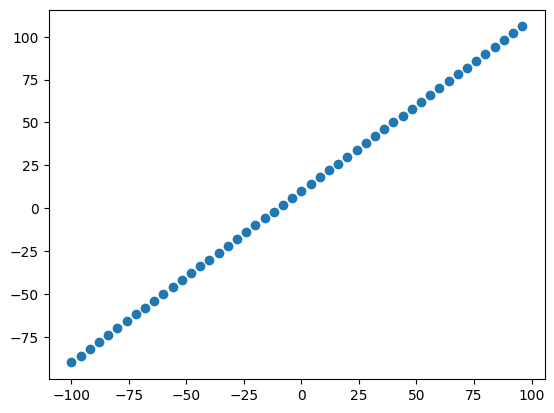

In [26]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40,), (10,), (40,), (10,))

In [28]:
len(X)

50

In [29]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

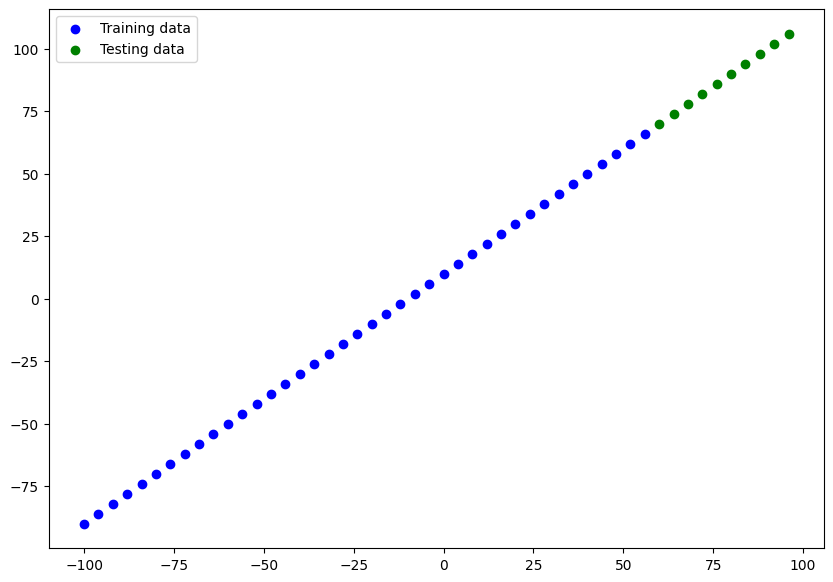

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [32]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Let's fit our model.
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 10.6957 - mae: 10.6957
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5814 - mae: 9.5814
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.0490 - mae: 11.0490
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3233 - mae: 9.3233
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1970 - mae: 10.1970
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4551 - mae: 9.4551
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5901 - mae: 8.5901
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0390 - mae: 9.0390
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8144 - mae: 18.8144
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1440 - mae: 10.1440
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.build(input_shape=[None, 2])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [38]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [39]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

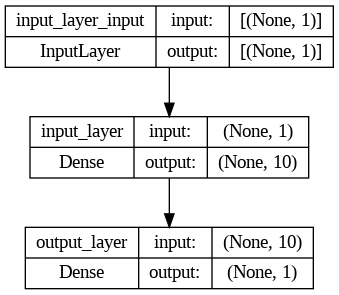

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1], name="hidden_layer_1"),
    tf.keras.layers.Dense(10, name="hidden_layer_2"),
    tf.keras.layers.Dense(5, name="hidden_layer_3"),
    tf.keras.layers.Dense(1, name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5)                 10        
                                                                 
 hidden_layer_2 (Dense)      (None, 10)                60        
                                                                 
 hidden_layer_3 (Dense)      (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

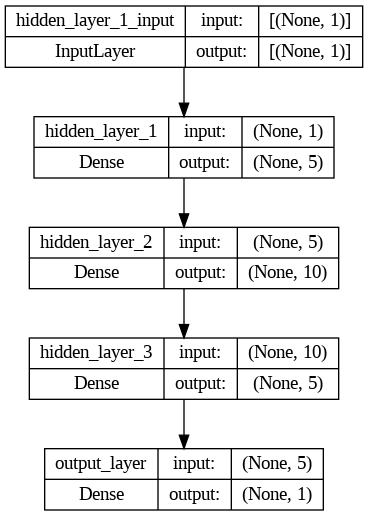

In [43]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [44]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[55.014385],
       [58.61041 ],
       [62.206417],
       [65.80243 ],
       [69.398445],
       [72.99448 ],
       [76.59047 ],
       [80.18649 ],
       [83.78252 ],
       [87.378525]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(5, input_shape=[1]),
  tf.keras.layers.Dense(1)
   # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [47]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[ 78.15896 ],
       [ 83.25469 ],
       [ 88.350426],
       [ 93.44616 ],
       [ 98.54189 ],
       [103.63763 ],
       [108.73336 ],
       [113.829094],
       [118.92483 ],
       [124.02056 ]], dtype=float32)

In [48]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [49]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_pred.shape

(TensorShape([40]),
 TensorShape([40]),
 TensorShape([10]),
 TensorShape([10]),
 (10, 1))

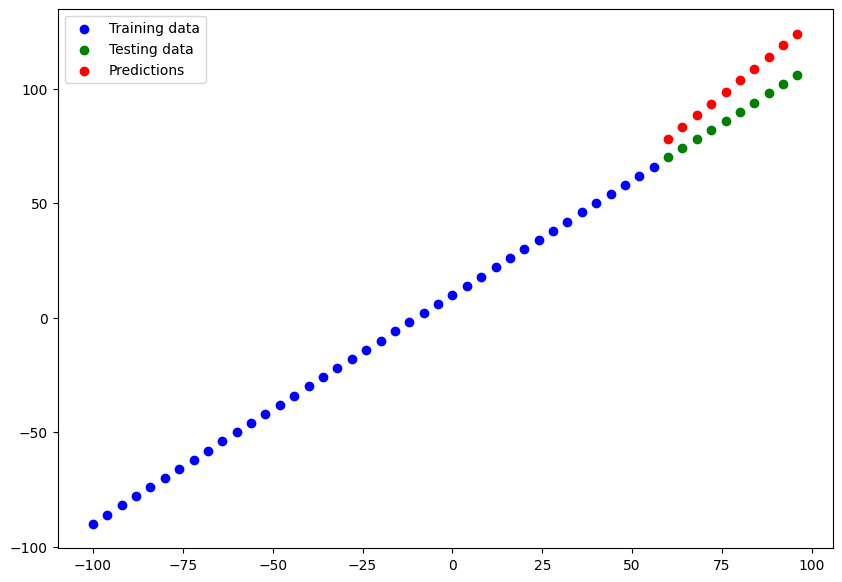

In [51]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics

In [52]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 13.0898 - mae: 13.0898


[13.089759826660156, 13.089759826660156]

In [53]:
y_pred

array([[ 78.15896 ],
       [ 83.25469 ],
       [ 88.350426],
       [ 93.44616 ],
       [ 98.54189 ],
       [103.63763 ],
       [108.73336 ],
       [113.829094],
       [118.92483 ],
       [124.02056 ]], dtype=float32)

In [54]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [55]:
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.336416, 10.549062, 10.      , 10.689232, 12.725136, 16.110102,
       20.73336 , 25.829096, 30.92483 , 36.02056 ], dtype=float32)>

In [56]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.336416, 10.549062, 10.      , 10.689232, 12.725136, 16.110102,
       20.73336 , 25.829096, 30.92483 , 36.02056 ], dtype=float32)>

In [57]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.08976>

In [58]:
mse = tf.metrics.mean_squared_error(y_test,
                                   tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=181.24702>

In [59]:
tf.keras.losses.mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.08976>

In [60]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

In [61]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

1.`model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4` - 3 layers, trained for 100 epochs
5. `model_5` - 3 layers, trained for 500 epochs

In [62]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 86.9190 - mae: 86.9190
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 51.4636 - mae: 51.4636
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 16.1957 - mae: 16.1957
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6296 - mae: 8.6296
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9216 - mae: 10.9216
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0975 - mae: 10.0975
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1316 - mae: 9.1316
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1227 - mae: 9.1227
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 15.0807 - mae: 15.0807
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 7.6068 - mae: 7.6068
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 40ms/step


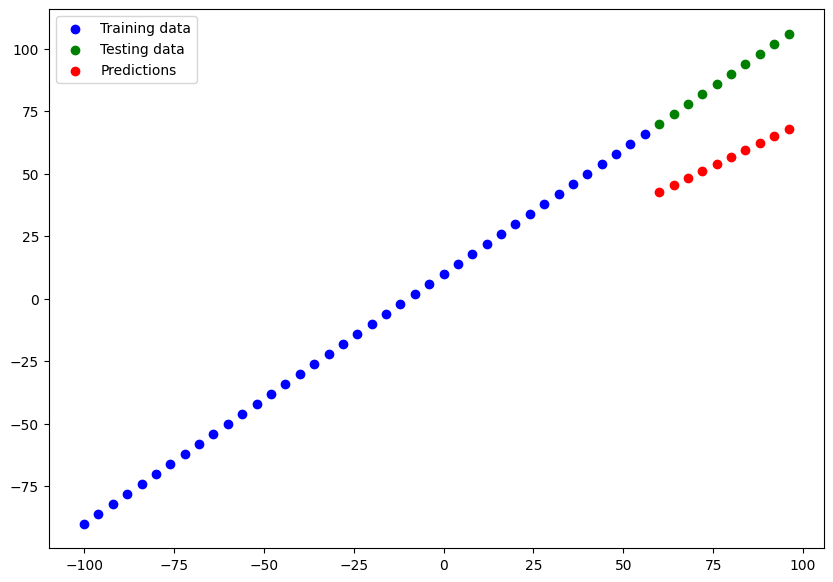

In [63]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [64]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.736866>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1084.2085>)

In [65]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 30.9303 - mae: 30.9303
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 19.6258 - mae: 19.6258
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 26.2331 - mae: 26.2331
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 12.8167 - mae: 12.8167
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 15.7719 - mae: 15.7719
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 12.4902 - mae: 12.4902
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7427 - mae: 11.7427
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7822 - mae: 10.7822
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 36.6670 - mae: 36.6670
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 24.4654 - mae: 24.4654
Epoch 11/100
2/2 [==============================] - 0s

In [66]:
y_preds_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 51ms/step


In [67]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.369723>,
 <tf.Tensor: shape=(), dtype=float32, numpy=188.84268>)

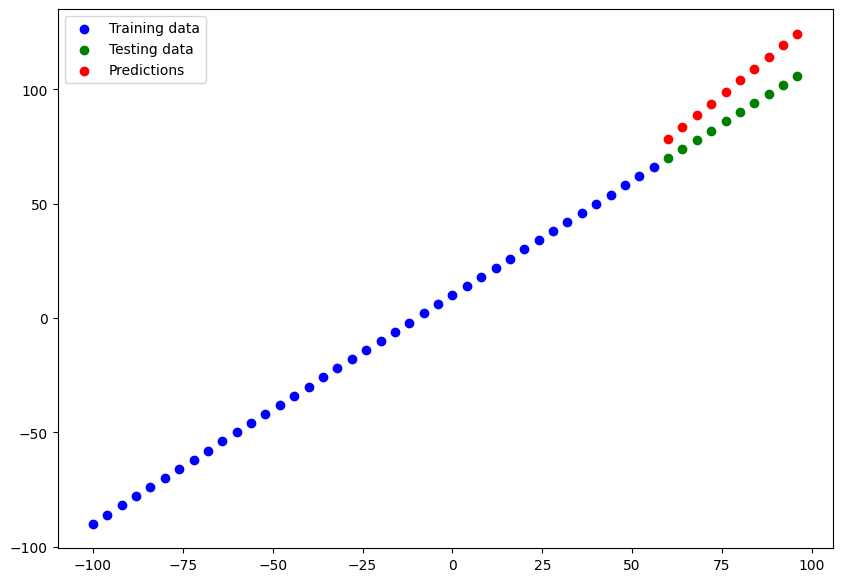

In [68]:
plot_predictions(predictions=y_preds_2)

In [69]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [70]:
y_preds_3 = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [71]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=13.08976>,
 <tf.Tensor: shape=(), dtype=float32, numpy=181.24702>)

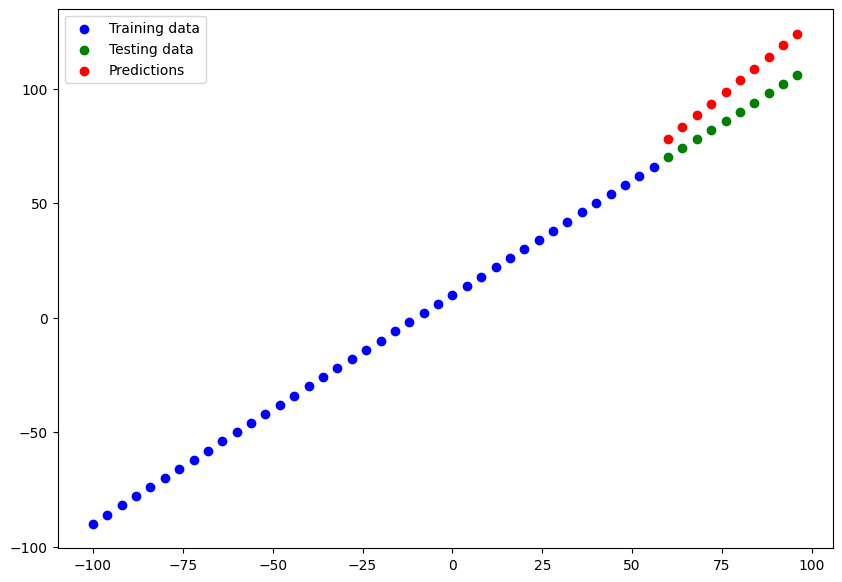

In [72]:
plot_predictions(predictions=y_preds_3)

## Comparing the results of our experiments

In [73]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,32.736866,1084.208496
1,model_2,13.369723,188.842682
2,model_3,13.089760,181.247025


<Axes: xlabel='Model No.', ylabel='Error Value'>

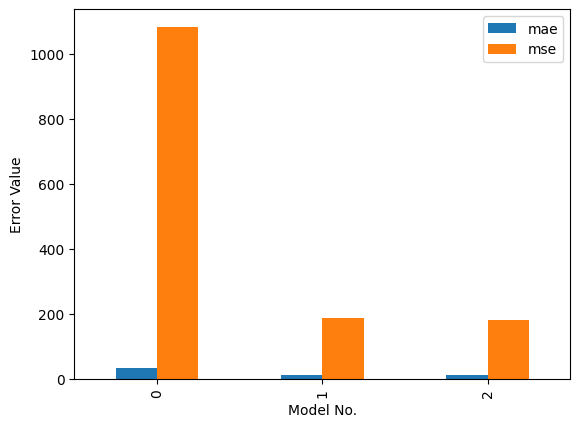

In [74]:
all_results.plot.bar(xlabel="Model No.",
                     ylabel="Error Value")

## Tracking your experiments

We can use TensorBoard (will be covered later) to track the various experiments.

## TensorBoard

## Savaing our models

In [75]:
model_2.save("best_model_SavedModel_format")

In [76]:
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [77]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 8         
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 8         
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compare model_2 predictions with SaveModel format
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 47ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [80]:
model_2_preds, loaded_SavedModel_format_preds

(array([[ 78.39235 ],
        [ 83.498436],
        [ 88.604515],
        [ 93.710594],
        [ 98.81668 ],
        [103.92276 ],
        [109.02885 ],
        [114.13493 ],
        [119.24101 ],
        [124.3471  ]], dtype=float32),
 array([[ 78.39235 ],
        [ 83.498436],
        [ 88.604515],
        [ 93.710594],
        [ 98.81668 ],
        [103.92276 ],
        [109.02885 ],
        [114.13493 ],
        [119.24101 ],
        [124.3471  ]], dtype=float32))

In [81]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [82]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 8         
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 8         
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [84]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 55ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

In [85]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

## A large example

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [88]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [90]:
# one-hot encode
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [91]:
# Create X & y values (features and labels)
# Create training and test sets
# Build a neural network (sort of like model_2 above) 

In [92]:
len(insurance_one_hot)

1338

In [93]:
0.8 * 1338

1070.4

In [94]:
X = insurance_one_hot.drop("charges", axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [95]:
y = insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [96]:
X_train = X.iloc[:1070]
y_train = y.iloc[:1070]

X_test = X.iloc[1070:]
y_test = y.iloc[1070:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [97]:
X_train.dtypes, y_train.dtypes

(age                   int64
 bmi                 float64
 children              int64
 sex_female            uint8
 sex_male              uint8
 smoker_no             uint8
 smoker_yes            uint8
 region_northeast      uint8
 region_northwest      uint8
 region_southeast      uint8
 region_southwest      uint8
 dtype: object,
 dtype('float64'))

In [98]:
y_train.dtypes

dtype('float64')

In [99]:
type(X_train)

pandas.core.frame.DataFrame

In [100]:
# Converting to tensors
# X_train = tf.constant(X_train)
# y_train = tf.constant(y_train)
# X_test = tf.constant(X_test)
# y_test = tf.constant(y_test)

# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [101]:
# Creating a NN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=([11]), name="layer_1"),
    # tf.keras.layers.Dense(10, name="layer_2"),
    # tf.keras.layers.Dense(5, name="layer_3"),
    # tf.keras.layers.Dense(1, name="layer_4_output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 15)                180       
                                                                 
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


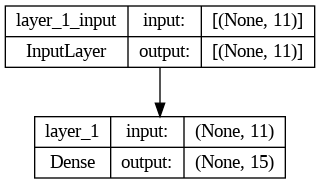

In [102]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [103]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13184.8369 - mae: 13184.8369
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13127.7139 - mae: 13127.7139
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13070.6328 - mae: 13070.6328
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13013.6396 - mae: 13013.6396
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12956.6689 - mae: 12956.6689
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 12899.7168 - mae: 12899.7168
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 12842.6836 - mae: 12842.6836
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 12785.5693 - mae: 12785.5693
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 12728.5625 - mae: 12728.5625
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 12671.56

In [104]:
model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


array([[ 8454.351 ,  8453.643 ,  8456.849 , ...,  8459.025 ,  8455.836 ,
         8460.252 ],
       [12215.411 , 12214.014 , 12213.125 , ..., 12213.353 , 12214.115 ,
        12213.277 ],
       [ 5494.5483,  5495.803 ,  5498.499 , ...,  5501.6484,  5496.9736,
         5502.8643],
       ...,
       [ 5399.19  ,  5399.058 ,  5404.3853, ...,  5408.1284,  5402.4995,
         5410.2163],
       [ 5121.479 ,  5122.256 ,  5125.0054, ...,  5127.262 ,  5124.243 ,
         5127.5684],
       [11736.952 , 11734.439 , 11734.138 , ..., 11734.539 , 11734.641 ,
        11731.6875]], dtype=float32)

In [105]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [107]:
# Creating a NN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=([11]), name="layer_1"),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 15)                180       
                                                                 
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
34/34 [==============================] - 0s 5ms/step - loss: 4635.0259 - mae: 4635.0259
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 4619.9009 - mae: 4619.9009
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 4331.9233 - mae: 4331.9233
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 4449.3081 - mae: 4449.3081
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 4629.7793 - mae: 4629.7793
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 4410.3960 - mae: 4410.3960
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 4463.9678 - mae: 4463.9678
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 4497.0605 - mae: 4497.0605
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 4580.4458 - mae: 4580.4458
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 4417.7285 - mae: 4417.7285

KeyboardInterrupt: ignored

In [123]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.005),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
34/34 [==============================] - 1s 3ms/step - loss: 8330.3271 - mae: 8330.3271
Epoch 2/1000
34/34 [==============================] - 0s 3ms/step - loss: 7291.3359 - mae: 7291.3359
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 7449.1851 - mae: 7449.1851
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 7255.5498 - mae: 7255.5498
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 7424.9966 - mae: 7424.9966
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 7614.8086 - mae: 7614.8086
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 7533.1748 - mae: 7533.1748
Epoch 8/1000
34/34 [==============================] - 0s 3ms/step - loss: 7371.0254 - mae: 7371.0254
Epoch 9/1000
34/34 [==============================] - 0s 3ms/step - loss: 7407.7007 - mae: 7407.7007
Epoch 10/1000
34/34 [==============================] - 0s 3ms/step - loss: 7454.5732 - mae:

In [125]:
y_preds = model.predict(X_test)
len(y_preds)

9/9 [==============================] - 0s 2ms/step


268

In [126]:
mae(y_test, y_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=7086.6143>

In [120]:
len(y_test), len(y_preds)

(268, 268)

In [121]:
y_test.shape, y_preds.shape

((268,), (268, 3))

In [128]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.005),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
34/34 [==============================] - 2s 5ms/step - loss: 8515.5166 - mae: 8515.5166
Epoch 2/1000
34/34 [==============================] - 0s 5ms/step - loss: 7452.4570 - mae: 7452.4570
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 7338.6685 - mae: 7338.6685
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 7293.8438 - mae: 7293.8438
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 7415.6226 - mae: 7415.6226
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 7350.6133 - mae: 7350.6133
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 7445.4404 - mae: 7445.4404
Epoch 8/1000
34/34 [==============================] - 0s 3ms/step - loss: 7431.6636 - mae: 7431.6636
Epoch 9/1000
34/34 [==============================] - 0s 3ms/step - loss: 7448.5312 - mae: 7448.5312
Epoch 10/1000
34/34 [==============================] - 0s 3ms/step - loss: 7300.6284 - mae:

In [129]:
mae(y_test, model.predict(X_test))

9/9 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=7285.1484>

In [131]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 12977.5518 - mae: 12977.5518
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 12816.7744 - mae: 12816.7744
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12476.3828 - mae: 12476.3828
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11807.1309 - mae: 11807.1309
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10687.5615 - mae: 10687.5615
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9252.1104 - mae: 9252.1104
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7938.9478 - mae: 7938.9478
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7338.2148 - mae: 7338.2148
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7226.8633 - mae: 7226.8633
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7198.8247 - mae:

In [132]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4405.4883 - mae: 4405.4883


[4405.48828125, 4405.48828125]

Text(0.5, 0, 'epochs')

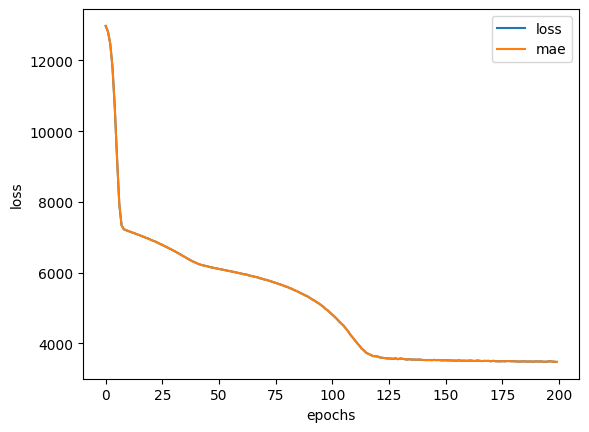

In [133]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [143]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [134]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

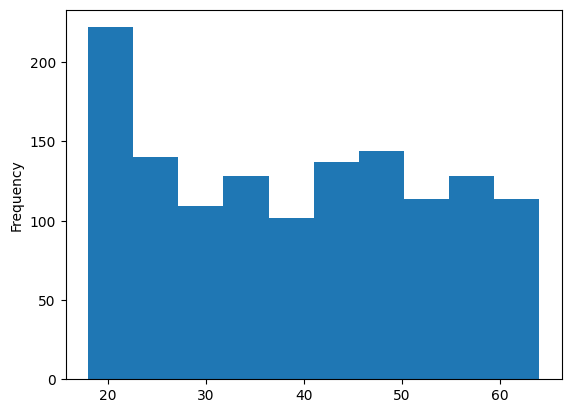

In [139]:
X["age"].plot.hist()

<Axes: ylabel='Frequency'>

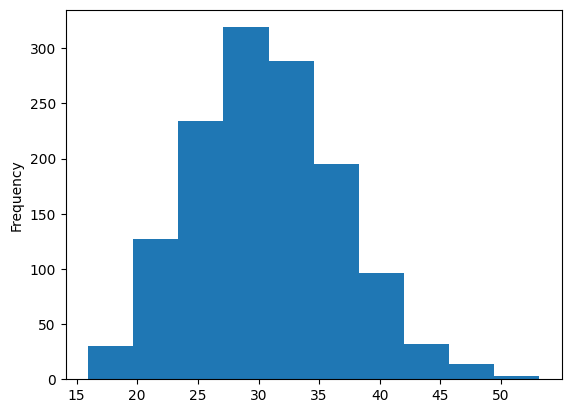

In [138]:
X["bmi"].plot.hist()

In [140]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Neural networks tend to prefer normalization.

In [144]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                    
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [145]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [149]:
X_train_normal.shape

(1070, 11)

In [150]:
X_train.shape

(1070, 6)

In [151]:
type(X_train), type(X_train_normal)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [152]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [153]:
X_train_normal[76]

array([0.        , 0.38081786, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

Beautiful! Our data has been normalizer and one hot encoded. Now let's build a neural network.

In [157]:
tf.random.set_seed(42)

insurance_model_normalized = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_normalized.compile(loss=tf.keras.losses.mae,
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=["mae"])

insurance_model_normalized.fit(X_train_normal, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 3s 6ms/step - loss: 13343.5654 - mae: 13343.5654
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13335.1611 - mae: 13335.1611
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13314.6729 - mae: 13314.6729
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13271.8467 - mae: 13271.8467
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13195.4473 - mae: 13195.4473
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13074.0166 - mae: 13074.0166
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12897.1318 - mae: 12897.1318
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12654.7021 - mae: 12654.7021
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12336.5303 - mae: 12336.5303
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11937.90

In [158]:
insurance_model_normalized.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3169.2532 - mae: 3169.2532


[3169.253173828125, 3169.253173828125]